In [1]:
import numpy as np 
import pandas as pd

In [2]:
import pandas as pd

# Read the file with the assumed correct encoding
try:
    # Reading with ISO-8859-1 encoding
    data = pd.read_csv('./Book_Details.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    # Handle potential encoding errors
    print("Error reading file. Check the encoding.")

# Define the function to correct encoding
def correct_encoding(text):
    try:
        # Try to correct the encoding
        return text.encode('ISO-8859-1').decode('utf-8')
    except UnicodeDecodeError:
        # If an error occurs, return the original text
        return text

# Apply the encoding correction to the DataFrame column
data['Description'] = data['Description'].apply(correct_encoding)
data['Title'] = data['Title'].apply(correct_encoding)

# Print or inspect the corrected data
print(data['Description'])


0       John Berger’s Classic Text on Art\n\nWays of S...
1       Renowned not only as the best concise introduc...
2       You don’t need to be a genius, you just need t...
3       When Drawing on the Right Side of the Brain wa...
4       The Artist’s Way is the seminal book on the su...
                              ...                        
4152    For fans of Madeline Miller's Circe, a stunnin...
4153    Euripides' classic drama about the often morti...
4154    In The Persian Expedition, Xenophon, a young A...
4155    The House of Atreus is cursed. A bloodline tai...
4156    The Greek myths are one of the most important ...
Name: Description, Length: 4157, dtype: object


In [3]:
print(data['Title'])

0                                          Ways of Seeing
1                                        The Story of Art
2       Steal Like an Artist: 10 Things Nobody Told Yo...
3          The New Drawing on the Right Side of the Brain
4       The Artist's Way: A Spiritual Path to Higher C...
                              ...                        
4152                                         Clytemnestra
4153                                          The Bacchae
4154                               The Persian Expedition
4155                                              Elektra
4156              Pandora's Jar: Women in the Greek Myths
Name: Title, Length: 4157, dtype: object


In [4]:
data.head()

,Title,Author,Description,Image_Url,Average_Rating,Total_Rating_Count
0,Ways of Seeing,John Berger,John Berger’s Classic Text on Art\n\nWays of S...,https://images-na.ssl-images-amazon.com/images...,3.92,"3,78,573"
1,The Story of Art,E.H. Gombrich,Renowned not only as the best concise introduc...,https://images-na.ssl-images-amazon.com/images...,3.96,"4,17,875"
2,Steal Like an Artist: 10 Things Nobody Told Yo...,Austin Kleon,"You don’t need to be a genius, you just need t...",https://images-na.ssl-images-amazon.com/images...,3.96,"2,93,826"
3,The New Drawing on the Right Side of the Brain,Betty Edwards,When Drawing on the Right Side of the Brain wa...,https://images-na.ssl-images-amazon.com/images...,3.87,"3,56,503"
4,The Artist's Way: A Spiritual Path to Higher C...,Julia Cameron,The Artist’s Way is the seminal book on the su...,https://images-na.ssl-images-amazon.com/images...,3.95,"1,12,017"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               4157 non-null   object 
 1   Author              4157 non-null   object 
 2   Description         4157 non-null   object 
 3   Image_Url           4157 non-null   object 
 4   Average_Rating      4157 non-null   float64
 5   Total_Rating_Count  4157 non-null   object 
dtypes: float64(1), object(5)
memory usage: 195.0+ KB


In [6]:
data.describe()

,Average_Rating
count,4157.000000
mean,4.052314
std,0.268835
min,0.000000
25%,3.890000
50%,4.060000
75%,4.230000
max,4.850000


In [7]:
data.describe(include=['object'])

,Title,Author,Description,Image_Url,Total_Rating_Count
count,4157,4157,4157,4157,4157
unique,4132,2454,4153,4141,4032
top,The Awakening,William Shakespeare,You can’t stop the future.\nYou can’t rewind t...,https://dryofg8nmyqjw.cloudfront.net/images/no...,"3,635"
freq,3,31,2,4,3


In [8]:
# Remove commas and convert to integer
data['Total_Rating_Count'] = data['Total_Rating_Count'].str.replace(',', '').astype(int)

In [9]:
data.head()

,Title,Author,Description,Image_Url,Average_Rating,Total_Rating_Count
0,Ways of Seeing,John Berger,John Berger’s Classic Text on Art\n\nWays of S...,https://images-na.ssl-images-amazon.com/images...,3.92,378573
1,The Story of Art,E.H. Gombrich,Renowned not only as the best concise introduc...,https://images-na.ssl-images-amazon.com/images...,3.96,417875
2,Steal Like an Artist: 10 Things Nobody Told Yo...,Austin Kleon,"You don’t need to be a genius, you just need t...",https://images-na.ssl-images-amazon.com/images...,3.96,293826
3,The New Drawing on the Right Side of the Brain,Betty Edwards,When Drawing on the Right Side of the Brain wa...,https://images-na.ssl-images-amazon.com/images...,3.87,356503
4,The Artist's Way: A Spiritual Path to Higher C...,Julia Cameron,The Artist’s Way is the seminal book on the su...,https://images-na.ssl-images-amazon.com/images...,3.95,112017


In [10]:
# Check for missing values
print(data.isnull().sum())

Title                 0
Author                0
Description           0
Image_Url             0
Average_Rating        0
Total_Rating_Count    0
dtype: int64


In [11]:
data.duplicated().sum()

0

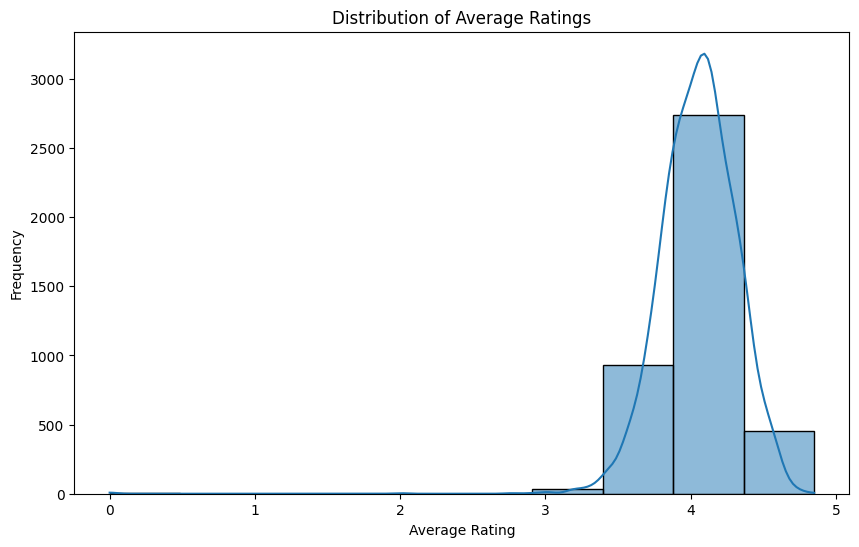

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Average_Rating'], bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

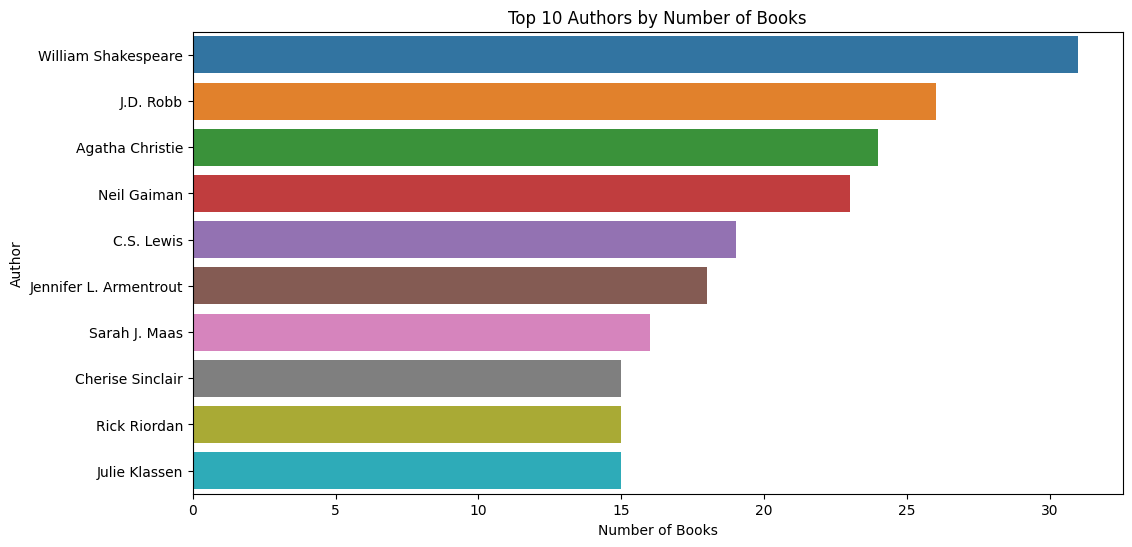

In [13]:
top_authors = data['Author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


In [14]:
sorted_by_avg_rating = data.sort_values(by='Average_Rating', ascending=False)

In [15]:
sorted_by_avg_rating

,Title,Author,Description,Image_Url,Average_Rating,Total_Rating_Count
2590,Insights from a Prophet’s Life: Russell M. Nelson,Sheri Dew,What kind of life preparation does the Lord gi...,https://images-na.ssl-images-amazon.com/images...,4.85,5966
1675,The Secret Gospel Of Jesus AD 0-78,Anton Sammut,Once the caravan reached the Kashmir Valley be...,https://images-na.ssl-images-amazon.com/images...,4.77,57
3342,Words of Radiance,Brandon Sanderson,"Words of Radiance, Book Two of the Stormlight ...",https://images-na.ssl-images-amazon.com/images...,4.76,361637
2010,Searching for and Maintaining Peace: A Small T...,Jacques Philippe,This classic work is a short treatise on peace...,https://images-na.ssl-images-amazon.com/images...,4.74,4860
1168,How the Word Is Passed: A Reckoning with the H...,Clint Smith,Poet and contributor to The Atlantic Clint Smi...,https://images-na.ssl-images-amazon.com/images...,4.72,33598
...,...,...,...,...,...,...
104,Dulcitius Abraham,Hrotsvitha,Dulcitius is a Latin comedy written by Hrosvit...,https://images-na.ssl-images-amazon.com/images...,2.91,177
441,Pamela,Samuel Richardson,One of the most spectacular successes of the f...,https://images-na.ssl-images-amazon.com/images...,2.77,12622
1446,Revealing Eden,Victoria Foyt,Eden Newman must mate before her 18th birthday...,https://images-na.ssl-images-amazon.com/images...,2.00,984
1484,"Where science fails, according to a physicisT",Jim Al-Khalili,".THE WELL\nWhere science fails, according to a...",https://images-na.ssl-images-amazon.com/images...,0.00,0


In [16]:
sorted_by_total_rating = data.sort_values(by='Total_Rating_Count', ascending=False)

In [17]:
sorted_by_total_rating

,Title,Author,Description,Image_Url,Average_Rating,Total_Rating_Count
690,Harry Potter and the Sorcerer’s Stone,J.K. Rowling,An alternative cover for this ASIN can be foun...,https://images-na.ssl-images-amazon.com/images...,4.47,10133687
672,The Hunger Games,Suzanne Collins,"Could you survive on your own in the wild, wit...",https://images-na.ssl-images-amazon.com/images...,4.34,8735554
555,Twilight,Stephenie Meyer,About three things I was absolutely positive.\...,https://images-na.ssl-images-amazon.com/images...,3.65,6621794
833,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,https://images-na.ssl-images-amazon.com/images...,4.26,6171692
852,The Great Gatsby,F. Scott Fitzgerald,"The Great Gatsby, F. Scott Fitzgerald's third ...",https://images-na.ssl-images-amazon.com/images...,3.93,5283788
...,...,...,...,...,...,...
1458,The Sauropod Dinosaurs,Mark Hallett,"From The Land Before Time to Jurassic Park, im...",https://images-na.ssl-images-amazon.com/images...,4.58,38
604,Behinderung & Ableismus,Andrea SchÃ¶ne,In den letzten Jahren haben Behindertenrechtsa...,https://images-na.ssl-images-amazon.com/images...,4.59,22
1454,Light,Anne Miranda,A nonfiction book-in-rhyme about light for you...,https://images-na.ssl-images-amazon.com/images...,4.50,2
1484,"Where science fails, according to a physicisT",Jim Al-Khalili,".THE WELL\nWhere science fails, according to a...",https://images-na.ssl-images-amazon.com/images...,0.00,0


In [18]:
popular_df = data[data['Total_Rating_Count']>=data['Total_Rating_Count'].mean()].sort_values('Average_Rating',ascending=False).head(50)

In [22]:
popular_df

,Title,Author,Description,Image_Url,Average_Rating,Total_Rating_Count
3342,Words of Radiance,Brandon Sanderson,"Words of Radiance, Book Two of the Stormlight ...",https://images-na.ssl-images-amazon.com/images...,4.76,361637
1741,Know My Name,Chanel Miller,She was known to the world as Emily Doe when s...,https://images-na.ssl-images-amazon.com/images...,4.71,203658
3583,Kingdom of Ash,Sarah J. Maas,An alternative cover edition for this ISBN can...,https://images-na.ssl-images-amazon.com/images...,4.69,600886
3337,The Way of Kings,Brandon Sanderson,From #1 New York Times bestselling author Bran...,https://images-na.ssl-images-amazon.com/images...,4.66,508513
3574,A Court of Mist and Fury,Sarah J. Maas,The seductive and stunning #1 New York Times b...,https://images-na.ssl-images-amazon.com/images...,4.65,2054451
745,Just Mercy,Bryan Stevenson,An unforgettable true story about the potentia...,https://images-na.ssl-images-amazon.com/images...,4.63,233660
3581,Empire of Storms,Sarah J. Maas,An alternative cover edition for this ISBN can...,https://images-na.ssl-images-amazon.com/images...,4.62,718781
692,Harry Potter and the Deathly Hallows,J.K. Rowling,"Harry has been burdened with a dark, dangerous...",https://images-na.ssl-images-amazon.com/images...,4.62,3734277
940,The Nightingale,Kristin Hannah,In love we find out who we want to be.\nIn war...,https://images-na.ssl-images-amazon.com/images...,4.62,1394203
3350,Oathbringer,Brandon Sanderson,"In Oathbringer, the third volume of the New Yo...",https://images-na.ssl-images-amazon.com/images...,4.62,253671


In [19]:
data['Total_Rating_Count'].mean()

173855.71734423863

In [20]:
popular_df['Image_Url'][745]

'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1635827409i/20342617.jpg'

In [21]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))